In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Prequisites**

In [2]:
!python -m pip install paddlepaddle-gpu==2.4.2.post117 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
#!pip install paddlepaddle
!pip install paddleocr
!pip install pyclipper
!pip3 install Polygon3 -i https://pypi.tuna.tsinghua.edu.cn/simple
!pip3 install Polygon3
!pip install lmdb
!pip install lanms-nova
!pip install rapidfuzz
!pip install visualdl
!pip install scikit-image
!pip install imgaug

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.3/557.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.3.3 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you h

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Preparing metadata (setup.py) ... done
  Created wheel for Polygon3: filename=Polygon3-3.0.9.1-cp310-cp310-linux_x86_64.whl size=117749 sha256=5bcf42a1b26d19ef0476ab6949e31ce45c11604e9fa0f50153cc35cc7cea76bd
  Stored in directory: /root/.cache/pip/wheels/45/ba/b5/8885afb7a73386bb76d8ee40e8adbc17edfc429f5bbadb89a8
Successfully built Polygon3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.3/219.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lanms-nova: filename=lanms_nova-1.0.3-cp310-cp310-linux_x86_64.whl size=1268297 sha256=b01bce5c39257e6d7e343cff7a848e9356342edc68e417931ce5e2ed2a933d7c
  Stored in directory: /root/.cache/pip/wheels/61/ff/81/814bf77943755a77768709bba2eb39a0b5005d54dd22072e6d
Successfully built lanms-nova


In [1]:
import cv2
import os
import numpy as np
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
from imutils import perspective
import shutil
import os

In [2]:
path='/content/drive/MyDrive/OCR'
if not os.path.exists(path):
  os.makedirs(path)

In [12]:
%cd /content/drive/MyDrive/OCR

/content/drive/MyDrive/OCR


In [4]:
#https://drive.google.com/file/d/1bC68CzsSVTusZVvOkk7imSZSbgD1MqK2/view?usp=sharing
!unzip ./totaltext.zip -d ./Total-Text/
!rm ./totaltext.zip

Archive:  ./totaltext.zip
   creating: ./Total-Text/Images/
   creating: ./Total-Text/Images/Test/
  inflating: ./Total-Text/Images/Test/img1.jpg  
   creating: ./Total-Text/__MACOSX/
   creating: ./Total-Text/__MACOSX/Images/
   creating: ./Total-Text/__MACOSX/Images/Test/
  inflating: ./Total-Text/__MACOSX/Images/Test/._img1.jpg  
  inflating: ./Total-Text/Images/Test/img10.jpg  
  inflating: ./Total-Text/__MACOSX/Images/Test/._img10.jpg  
  inflating: ./Total-Text/Images/Test/img100.jpg  
  inflating: ./Total-Text/__MACOSX/Images/Test/._img100.jpg  
  inflating: ./Total-Text/Images/Test/img1000.jpg  
  inflating: ./Total-Text/__MACOSX/Images/Test/._img1000.jpg  
  inflating: ./Total-Text/Images/Test/img1055.jpg  
  inflating: ./Total-Text/__MACOSX/Images/Test/._img1055.jpg  
  inflating: ./Total-Text/Images/Test/img1091.jpg  
  inflating: ./Total-Text/__MACOSX/Images/Test/._img1091.jpg  
  inflating: ./Total-Text/Images/Test/img1092.jpg  
  inflating: ./Total-Text/__MACOSX/Images/Te

In [5]:
#https://drive.google.com/file/d/1v-pd-74EkZ3dWe6k0qppRtetjdPQ3ms1/view
!unzip ./txt_format.zip -d ./Total-Text/Annotation
!rm ./txt_format.zip

Archive:  ./txt_format.zip
   creating: ./Total-Text/Annotation/Test/
  inflating: ./Total-Text/Annotation/Test/poly_gt_img1298.txt  
   creating: ./Total-Text/Annotation/__MACOSX/
   creating: ./Total-Text/Annotation/__MACOSX/Test/
  inflating: ./Total-Text/Annotation/__MACOSX/Test/._poly_gt_img1298.txt  
  inflating: ./Total-Text/Annotation/Test/poly_gt_img496.txt  
  inflating: ./Total-Text/Annotation/__MACOSX/Test/._poly_gt_img496.txt  
  inflating: ./Total-Text/Annotation/Test/poly_gt_img643.txt  
  inflating: ./Total-Text/Annotation/__MACOSX/Test/._poly_gt_img643.txt  
  inflating: ./Total-Text/Annotation/Test/poly_gt_img657.txt  
  inflating: ./Total-Text/Annotation/__MACOSX/Test/._poly_gt_img657.txt  
  inflating: ./Total-Text/Annotation/Test/poly_gt_img535.txt  
  inflating: ./Total-Text/Annotation/__MACOSX/Test/._poly_gt_img535.txt  
  inflating: ./Total-Text/Annotation/Test/poly_gt_img291.txt  
  inflating: ./Total-Text/Annotation/__MACOSX/Test/._poly_gt_img291.txt  
  infla

In [14]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47625, done.
remote: Counting objects: 100% (866/866), done.
remote: Compressing objects: 100% (387/387), done.
remote: Total 47625 (delta 558), reused 685 (delta 474), pack-reused 46759
Receiving objects: 100% (47625/47625), 345.23 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (33426/33426), done.
Updating files: 100% (1892/1892), done.


In [15]:
%cd /content/drive/MyDrive/OCR/PaddleOCR

/content/drive/MyDrive/OCR/PaddleOCR


In [16]:
!pwd

/content/drive/MyDrive/OCR/PaddleOCR


## **Create box detection data**

In [17]:
dir='/content/drive/MyDrive/OCR/PaddleOCR/'

In [18]:
path=dir+'train_data/detection_data'
if not os.path.exists(path):
  os.makedirs(path)
path=dir+"train_data/detection_data/det_train.txt"
if os.path.exists(path):
  os.remove(path)
path=dir+"train_data/detection_data/det_test.txt"
if os.path.exists(path):
  os.remove(path)

In [19]:
if not os.path.exists(dir+'train_data/detection_data/Total-Text'):
  shutil.copytree('/content/drive/MyDrive/OCR/Total-Text', dir+'train_data/detection_data/Total-Text')

In [20]:
print("Number of Training images are", len(os.listdir(dir+'train_data/detection_data/Total-Text/Images/Train')))

Number of Training images are 1255


In [21]:
# Preparing Training Annotation Text file

count = 0

flag = 1
for i in tqdm(os.listdir(dir+"train_data/detection_data/Total-Text/Images/Train")):
  img_path = os.path.join("Total-Text/Images/Train", i)
  bounding_box_path = os.path.join(dir+"train_data/detection_data/Total-Text/Annotation/Train", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3]
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
      dic["transcription"] = str(text)
      lis.append(dic)
    except Exception as e:
      #print(str(e))
      print('YA ZAHRA')
      flag = 0
  lis = json.dumps(lis)
  if(flag == 0):
    flag = 1
    continue
  if(lis == [] or lis=="[]"):
    continue
  with open(dir+"train_data/detection_data/det_train.txt", "a") as ob:
    ob.write(img_path+"\t"+str(lis)+"\n")
  count = count + 1

print("Total number of Annotations created for Training are ", count)

100%|██████████| 1255/1255 [00:04<00:00, 296.92it/s]

Total number of Annotations created for Training are  911


In [22]:
# Preparing Testing/Validation Annotation Text file

count = 0
flag = 1
for i in tqdm(os.listdir(dir+"train_data/detection_data/Total-Text/Images/Test")):
  img_path = os.path.join("Total-Text/Images/Test", i)
  bounding_box_path = os.path.join(dir+"train_data/detection_data/Total-Text/Annotation/Test", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  lis = []
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3]
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
      dic["transcription"] = str(text)
      lis.append(dic)
    except Exception as e:
      #print(str(e))
      flag = 0
  lis = json.dumps(lis)
  if(flag == 0):
    flag = 1
    continue
  if(lis == [] or lis=="[]"):
    continue
  with open(dir+"train_data/detection_data/det_test.txt", "a") as ob:
    ob.write(img_path+"\t"+str(lis)+"\n")
  count = count + 1

print("Total number of Annotations created for Test/Eval are ", count)

100%|██████████| 300/300 [00:01<00:00, 295.29it/s]

Total number of Annotations created for Test/Eval are  212


## **Create OCR data**

In [34]:
path=dir+'train_data/ocr_data/train'
if os.path.exists(path):
  shutil.rmtree(path)
os.makedirs(path+'/images')

path=dir+'train_data/ocr_data/test'
if os.path.exists(path):
  shutil.rmtree(path)
os.makedirs(path+'/images')

In [35]:
# Preparing the Testing/Eval Annotation File and images

count = 0
flag = 1
img_counter = 0
for i in tqdm(os.listdir(dir+"train_data/detection_data/Total-Text/Images/Train")):
  img_path = os.path.join(dir+"train_data/detection_data/Total-Text/Images/Train", i)
  bounding_box_path = os.path.join(dir+"train_data/detection_data/Total-Text/Annotation/Train", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3]
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
      dic["transcription"] = str(text)

      x1,y1,x2,y2,x3,y3,x4,y4 = int(x1), int(y1), int(x2), int(y2), int(x3), int(y3), int(x4), int(y4)

      pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])

      img = cv2.imread(img_path)

      warped = perspective.four_point_transform(img, pts)

      new_img_path ="images/img_"+str(img_counter)+".jpg"
      cv2.imwrite('train_data/ocr_data/train/'+new_img_path, warped)

      with open("./train_data/ocr_data/train/rec_train.txt", "a") as ob:

        ob.write(new_img_path+"\t"+text+"\n")
      img_counter = img_counter + 1
    except Exception as e:
      #print(str(e))
      #print('ya zahra')
      flag = 0
  if(flag == 0):
    flag = 1
    continue
  count = count + 1
print("Total number of Annotations created for Test/Eval are ", count)

100%|██████████| 1255/1255 [02:07<00:00,  9.84it/s]

Total number of Annotations created for Test/Eval are  1255


In [36]:
# Preparing the Testing/Eval Annotation File and images

count = 0
flag = 1
img_counter = 0
for i in tqdm(os.listdir(dir+"train_data/detection_data/Total-Text/Images/Test")):
  img_path = os.path.join(dir+"train_data/detection_data/Total-Text/Images/Test", i)
  bounding_box_path = os.path.join(dir+"train_data/detection_data/Total-Text/Annotation/Test", "poly_gt_"+i.split(".")[0]+".txt")
  var = open(bounding_box_path, "r")
  var = var.readlines()
  for j in var:
    try:
      j = j.replace("\n", '')
      x_coordinates = j.split(",")[0].split("[")[2].split("]")[0].split(" ")
      y_coordinates = j.split(",")[1].split("[")[2].split("]")[0].split(" ")
      if(len(x_coordinates) != 4 or len(y_coordinates)!=4):
        continue
      #text = j.split(",")[3].split("[")[1].split("'")[1]
      if(j.split(" ")[-1]=="[]"):
        continue
      text = j.split(" ")[-1].split("'")[1]
      if("#" in text):
        text = "###"
      x1, x2, x3, x4 = x_coordinates[0], x_coordinates[1], x_coordinates[2], x_coordinates[3]
      y1, y2, y3, y4 = y_coordinates[0], y_coordinates[1], y_coordinates[2], y_coordinates[3]
      dic = {}
      dic["points"] = [[x1,y1], [x2,y2], [x3,y3], [x4,y4]]
      dic["transcription"] = str(text)

      x1,y1,x2,y2,x3,y3,x4,y4 = int(x1), int(y1), int(x2), int(y2), int(x3), int(y3), int(x4), int(y4)

      pts = np.asarray([(x1,y1), (x2,y2), (x3,y3), (x4,y4)])

      img = cv2.imread(img_path)

      warped = perspective.four_point_transform(img, pts)

      new_img_path ="images/img_"+str(img_counter)+".jpg"
      cv2.imwrite('train_data/ocr_data/test/'+new_img_path, warped)

      with open("./train_data/ocr_data/test/rec_test.txt", "a") as ob:

        ob.write(new_img_path+"\t"+text+"\n")
      img_counter = img_counter + 1
    except Exception as e:
      #print(str(e))
      #print('ya zahra')
      flag = 0
  if(flag == 0):
    flag = 1
    continue
  count = count + 1
print("Total number of Annotations created for Test/Eval are ", count)

100%|██████████| 300/300 [00:38<00:00,  7.73it/s]

Total number of Annotations created for Test/Eval are  297


## **Fine tuning box detection**

In [26]:
path=dir+'pretrain_models'
if not os.path.exists(path):
  os.makedirs(path)

In [27]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_distill_train.tar
!tar -xf ./pretrain_models/en_PP-OCRv3_det_distill_train.tar -C ./pretrain_models/
!rm -rf ./pretrain_models/en_PP-OCRv3_det_distill_train.tar

--2023-12-01 23:26:21--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_distill_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 36.110.192.178, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|36.110.192.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139335680 (133M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_det_distill_train.tar’

en_PP-OCRv3_det_dis 100%[===================>] 132.88M  25.9MB/s    in 6.4s    

2023-12-01 23:26:28 (20.9 MB/s) - ‘./pretrain_models/en_PP-OCRv3_det_distill_train.tar’ saved [139335680/139335680]



In [ ]:
#!python3 -m pip install --user paddlepaddle-gpu==2.4.1.post117 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html


In [ ]:
!python3 -c 'import paddle; print(paddle.__version__)'

2.4.1


In [28]:
os.remove(dir+'configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_student.yml')
shutil.copy('/content/drive/MyDrive/OCR/ch_PP-OCRv3_det_student.yml', dir+'configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_student.yml')

'/content/drive/MyDrive/OCR/PaddleOCR/configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_student.yml'

In [30]:
!python3 tools/train.py -c configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_student.yml -o   \
         Global.pretrained_model=./pretrain_models/en_PP-OCRv3_det_distill_train/student  \
         Optimizer.base_lr=0.0001

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.ai')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/lo

In [ ]:
'''
#Multi-GPU Training
!python3 -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c configs/det/det_mv3_db.yml -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained
'''

In [ ]:
'''
#Single GPU Training
!python3 tools/train.py -c configs/det/det_mv3_db.yml  \
         -o Global.pretrained_model=./pretrain_models/MobileNetV3_large_x0_5_pretrained
'''

## **Fine tuning OCR**

In [31]:
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
!tar -xf ./pretrain_models/en_PP-OCRv4_rec_train.tar -C ./pretrain_models/
!rm -rf ./pretrain_models/en_PP-OCRv4_rec_train.tar

--2023-12-01 23:43:35--  https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 36.110.192.178, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|36.110.192.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190740480 (182M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv4_rec_train.tar’

en_PP-OCRv4_rec_tra 100%[===================>] 181.90M  26.1MB/s    in 8.2s    

2023-12-01 23:43:45 (22.1 MB/s) - ‘./pretrain_models/en_PP-OCRv4_rec_train.tar’ saved [190740480/190740480]



In [32]:
os.remove(dir+'configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml')
shutil.copy('/content/drive/MyDrive/OCR/en_PP-OCRv4_rec.yml', dir+'configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml')

'/content/drive/MyDrive/OCR/PaddleOCR/configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml'

In [37]:
!python3 -m paddle.distributed.launch --gpus '0'  tools/train.py -c configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml -o Global.pretrained_model=./pretrain_models/en_PP-OCRv4_rec_train/best_accuracy

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.ai')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/lo

## **Converting Trained Weights to Inference Weights**

In [38]:
#conversion of Detection Trained Weights to Inference
!python3 tools/export_model.py -c configs/det/ch_PP-OCRv3/ch_PP-OCRv3_det_student.yml -o Global.pretrained_model="./output/en_PP-OCR_V3_det/latest" Global.save_inference_dir="./inference/en_PP-OCRv3_det_distill_inference/"

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.ai')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/lo

In [39]:
#Conversion of Recognizer Trained weights to Inference
!python3 tools/export_model.py -c configs/rec/PP-OCRv4/en_PP-OCRv4_rec.yml -o Global.pretrained_model="./output/rec_ppocr_v4/latest"  Global.save_inference_dir="./inference/en_PP-OCRv4_rec_inference/"

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.ai')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/lo

## **Cpy CLS inference model**

In [40]:
!wget -P ./inference/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar
!tar -xf ./inference/ch_ppocr_mobile_v2.0_cls_infer.tar -C ./inference/
!rm -rf ./inference/ch_ppocr_mobile_v2.0_cls_infer.tar

--2023-12-02 00:01:21--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2188800 (2.1M) [application/x-tar]
Saving to: ‘./inference/ch_ppocr_mobile_v2.0_cls_infer.tar’

ch_ppocr_mobile_v2. 100%[===================>]   2.09M   578KB/s    in 4.2s    

2023-12-02 00:01:27 (514 KB/s) - ‘./inference/ch_ppocr_mobile_v2.0_cls_infer.tar’ saved [2188800/2188800]

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.lastuseddate#PS'


## **Inference using Custom Weights in PyPi Version**

In [41]:
from paddleocr import PaddleOCR,draw_ocr
from PIL import Image

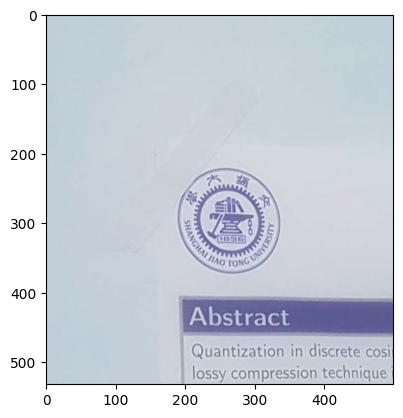

In [43]:
img_path ="./train_data/detection_data/Total-Text/Images/Test/img1098.jpg"
img=cv2.imread(img_path)
plt.imshow(img)

In [42]:
#Loading the detector and ocr with the previously trained weights
custom_ocr = PaddleOCR(use_angle_cls=True,lang="en",
                rec_model_dir='./inference/en_PP-OCRv4_rec_inference',
                det_model_dir='./inference/en_PP-OCRv3_det_distill_inference',
                cls_model_dir='./inference/ch_ppocr_mobile_v2.0_cls_infer',
                rec_char_dict_path='./ppocr/utils/en_dict.txt',
                use_gpu=True,
                show_log=False)

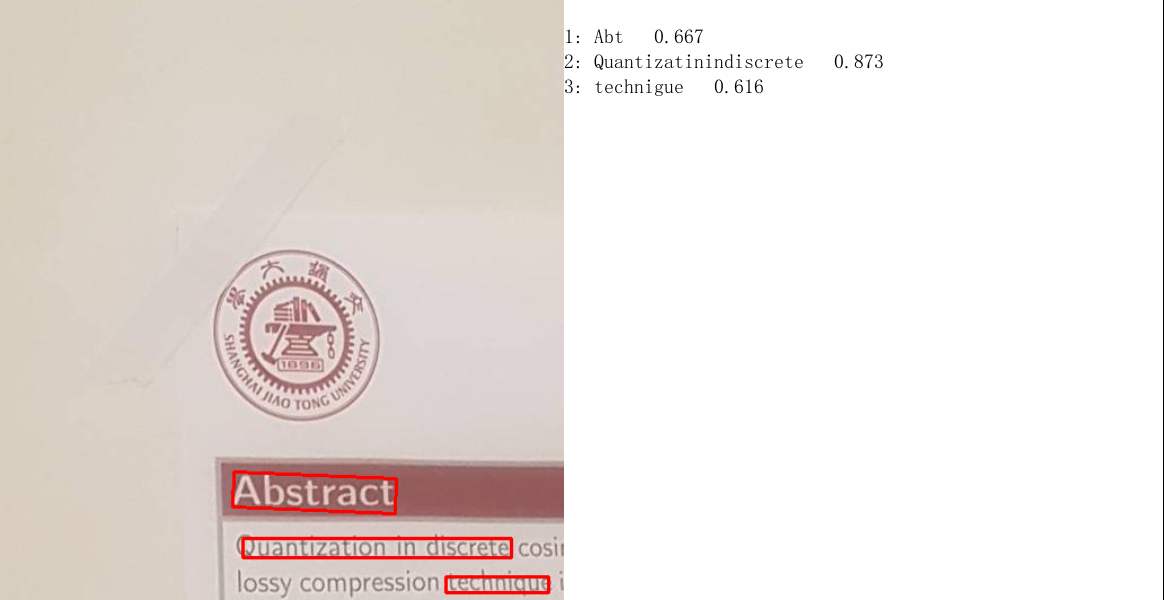

In [48]:
result = custom_ocr.ocr(img_path, cls=True)
# draw result
result=result[0]
image = Image.open(img_path)#.convert('RdownGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='doc/fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show
#im_show.save('result.jpg')